In [34]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
# !kaggle datasets download -d "token"

****Reading Dataset****

In [36]:
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [38]:
df.shape

(8128, 13)

***Data Cleaning***

In [39]:
df['Model'] = df['name'].str.split().str[0]
df.drop(columns=['name','torque','owner'], inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,Model
0,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [40]:
#convert type of column year to object type
# df['year'] = df['year'].astype('object')
# Get the current year
current_year = datetime.now().year
# Calculate Age based on the 'Year' column
df['Age'] = current_year - df['year']
df.drop(columns=['year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   mileage        7907 non-null   object 
 6   engine         7907 non-null   object 
 7   max_power      7913 non-null   object 
 8   seats          7907 non-null   float64
 9   Model          8128 non-null   object 
 10  Age            8128 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [41]:
df['mileage'] = pd.to_numeric(df['mileage'].str.split().str[0], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'].str.split().str[0], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'].str.split().str[0], errors='coerce')
# rename  column name
df.rename(columns={'mileage':'mileage_kmpl', 'engine':'engine_cc','max_power':'max_power_bhp'}, inplace=True)

df.head()

,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine_cc,max_power_bhp,seats,Model,Age
0,450000,145500,Diesel,Individual,Manual,23.40,1248.0,74.00,5.0,Maruti,10
1,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,Skoda,10
2,158000,140000,Petrol,Individual,Manual,17.70,1497.0,78.00,5.0,Honda,18
3,225000,127000,Diesel,Individual,Manual,23.00,1396.0,90.00,5.0,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,16.10,1298.0,88.20,5.0,Maruti,17


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   mileage_kmpl   7907 non-null   float64
 6   engine_cc      7907 non-null   float64
 7   max_power_bhp  7912 non-null   float64
 8   seats          7907 non-null   float64
 9   Model          8128 non-null   object 
 10  Age            8128 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [43]:
df.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
mileage_kmpl     221
engine_cc        221
max_power_bhp    216
seats            221
Model              0
Age                0
dtype: int64

In [44]:
df['mileage_kmpl'].fillna(df['mileage_kmpl'].mean(), inplace=True)
df['engine_cc'].fillna(df['engine_cc'].mean(), inplace=True)
df['max_power_bhp'].fillna(df['max_power_bhp'].mean(), inplace=True)

df['seats'] = df['seats'].replace([float('inf'), float('-inf')], np.nan)
df['seats'] = df['seats'].fillna(0).astype(int)
df['seats'].fillna(df['seats'].mode()[0], inplace=True)
df.isnull().sum()



selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
mileage_kmpl     0
engine_cc        0
max_power_bhp    0
seats            0
Model            0
Age              0
dtype: int64

In [45]:
df.duplicated().sum()

1249

In [46]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine_cc,max_power_bhp,seats,Model,Age
291,450000,35000,Petrol,Individual,Manual,18.90,1197.0,82.00,5,Hyundai,7
296,330000,50000,Petrol,Individual,Manual,18.60,1197.0,85.80,5,Maruti,12
370,2625000,9000,Diesel,Dealer,Automatic,13.60,1999.0,177.00,5,Jaguar,7
371,5150000,20000,Petrol,Dealer,Automatic,22.37,2487.0,214.56,5,Lexus,5
372,3200000,45000,Diesel,Dealer,Automatic,19.33,1999.0,177.00,5,Jaguar,7
...,...,...,...,...,...,...,...,...,...,...,...
7988,1025000,32000,Diesel,Individual,Manual,28.09,1248.0,88.50,5,Maruti,5
8026,100000,120000,Diesel,Individual,Manual,19.09,1396.0,69.00,5,Tata,16
8117,625000,50000,Diesel,Individual,Manual,26.59,1248.0,74.00,5,Maruti,9
8126,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,5,Tata,11


In [47]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.shape

(6879, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6879 non-null   int64  
 1   km_driven      6879 non-null   int64  
 2   fuel           6879 non-null   object 
 3   seller_type    6879 non-null   object 
 4   transmission   6879 non-null   object 
 5   mileage_kmpl   6879 non-null   float64
 6   engine_cc      6879 non-null   float64
 7   max_power_bhp  6879 non-null   float64
 8   seats          6879 non-null   int32  
 9   Model          6879 non-null   object 
 10  Age            6879 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 564.4+ KB


In [50]:
for i in df.columns:
  print(i , ':', df[i].nunique())

selling_price : 677
km_driven : 921
fuel : 4
seller_type : 3
transmission : 2
mileage_kmpl : 382
engine_cc : 122
max_power_bhp : 320
seats : 10
Model : 32
Age : 29


In [51]:
df.describe()

,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats,Age
count,6.879000e+03,6.879000e+03,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000
mean,5.182624e+05,7.399002e+04,19.462939,1432.858465,87.925509,5.270970,10.577410
std,5.211309e+05,5.845130e+04,3.992163,485.928047,31.322989,1.342319,4.081008
min,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,0.000000,4.000000
25%,2.500000e+05,4.000000e+04,16.950000,1197.000000,68.000000,5.000000,7.000000
50%,4.000000e+05,7.000000e+04,19.418783,1248.000000,81.860000,5.000000,10.000000
75%,6.350000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,13.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,41.000000


In [52]:
df.to_csv('cleaned_data.csv', index=False)

***Data Processing and Visualization***

In [53]:
num_col = df.select_dtypes(include = [np.number])
cat_col = df.select_dtypes(exclude = [np.number])

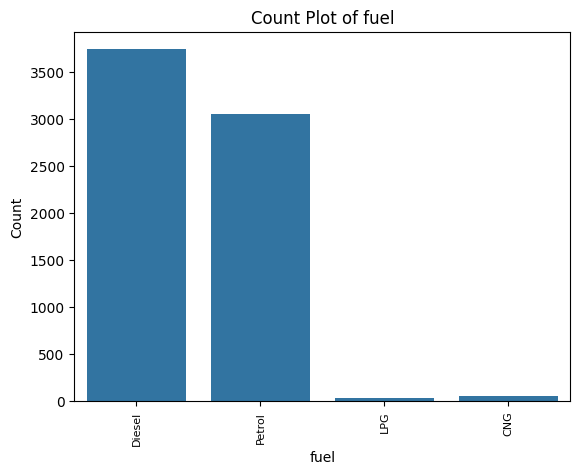

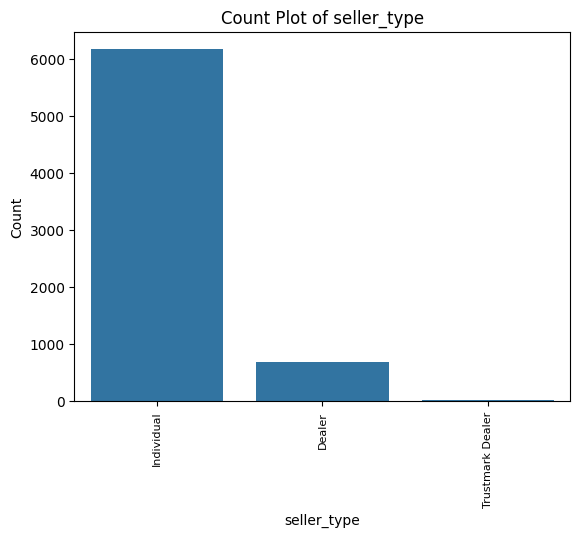

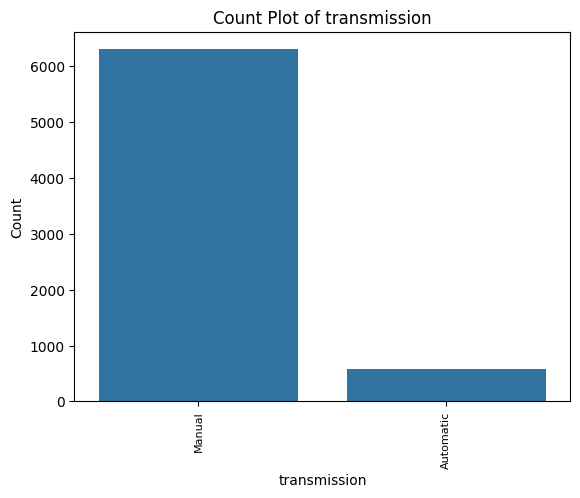

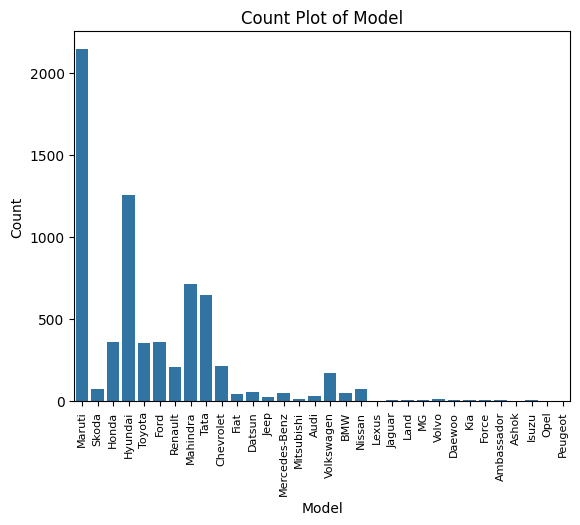

In [54]:
for col in cat_col:
    df[col] = df[col].astype('object')
    sns.countplot(data = df, x = col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Count')
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

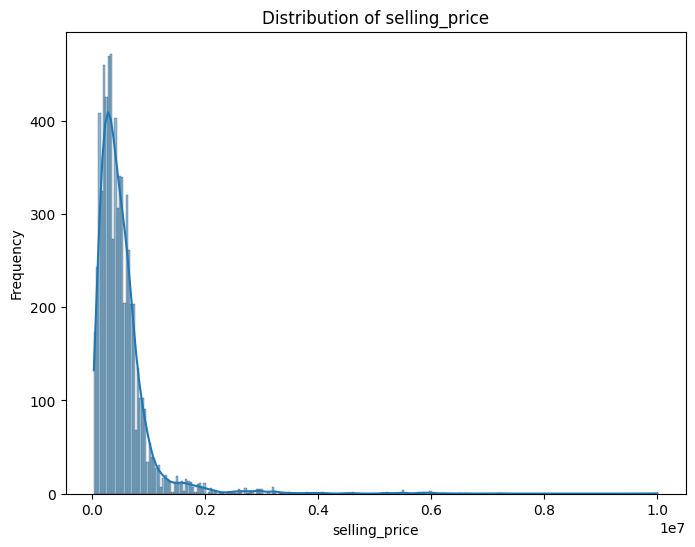

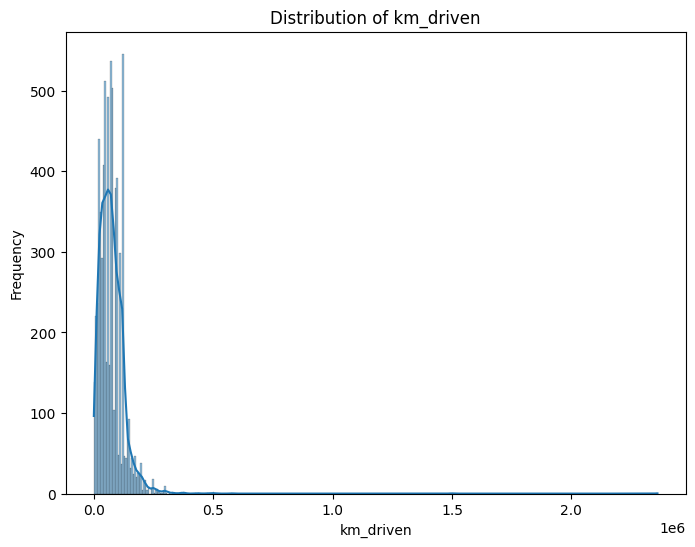

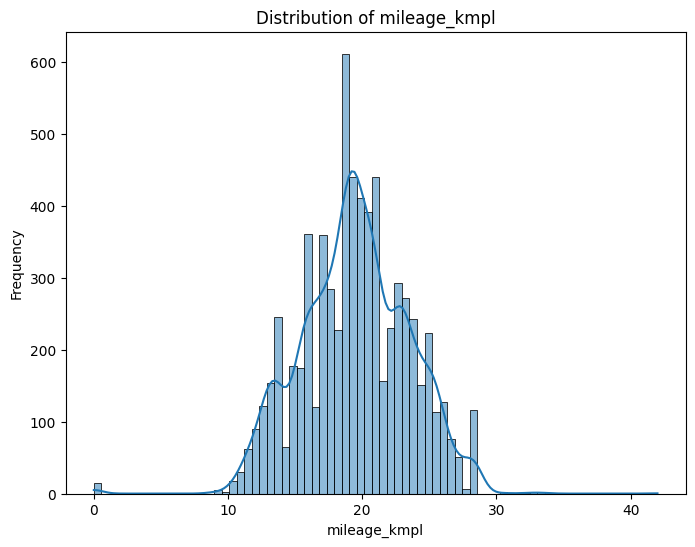

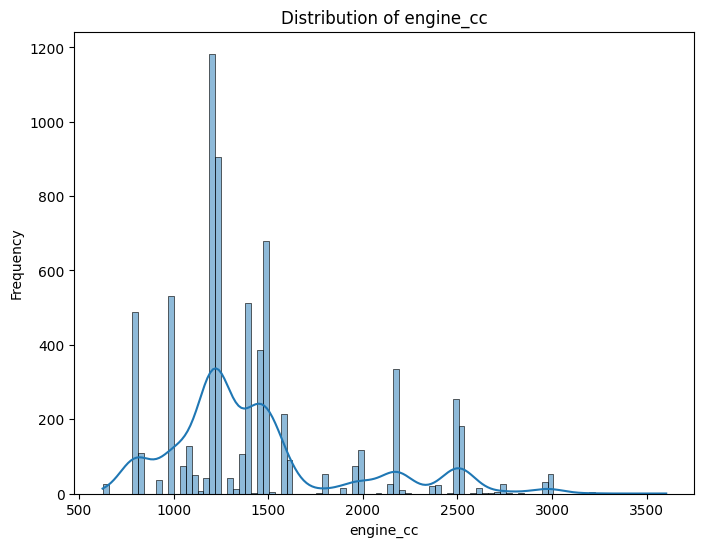

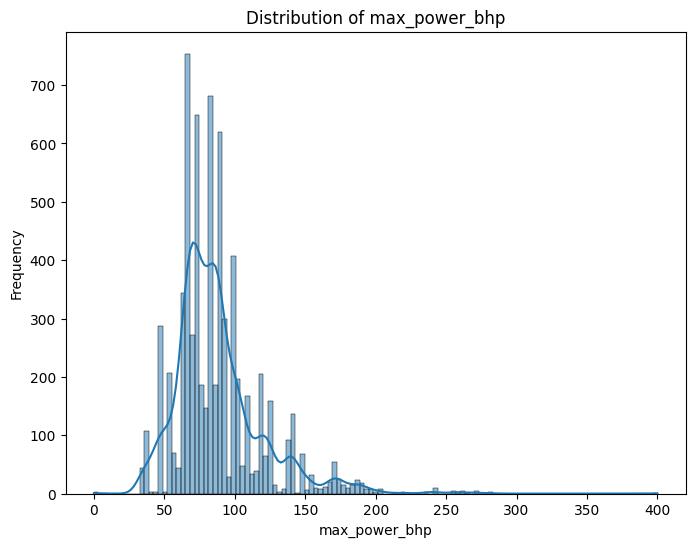

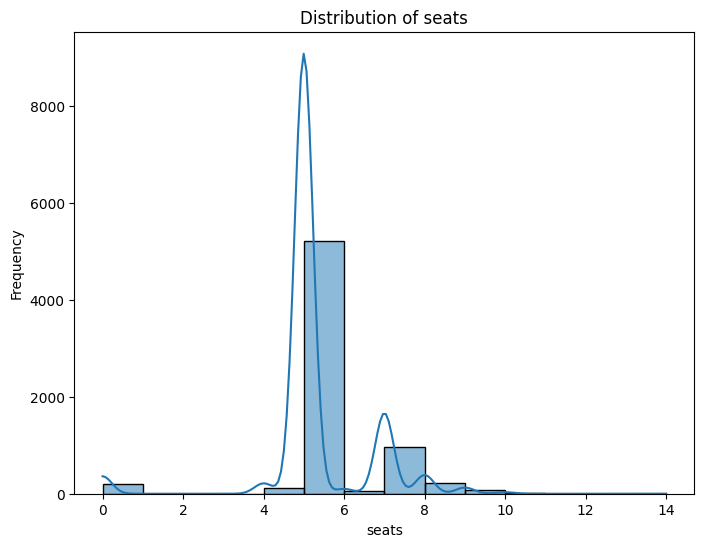

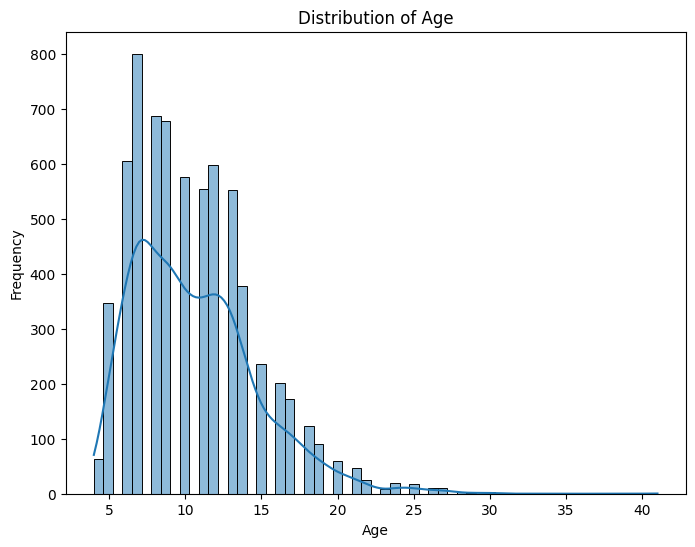

In [55]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


***Handling Outliers***

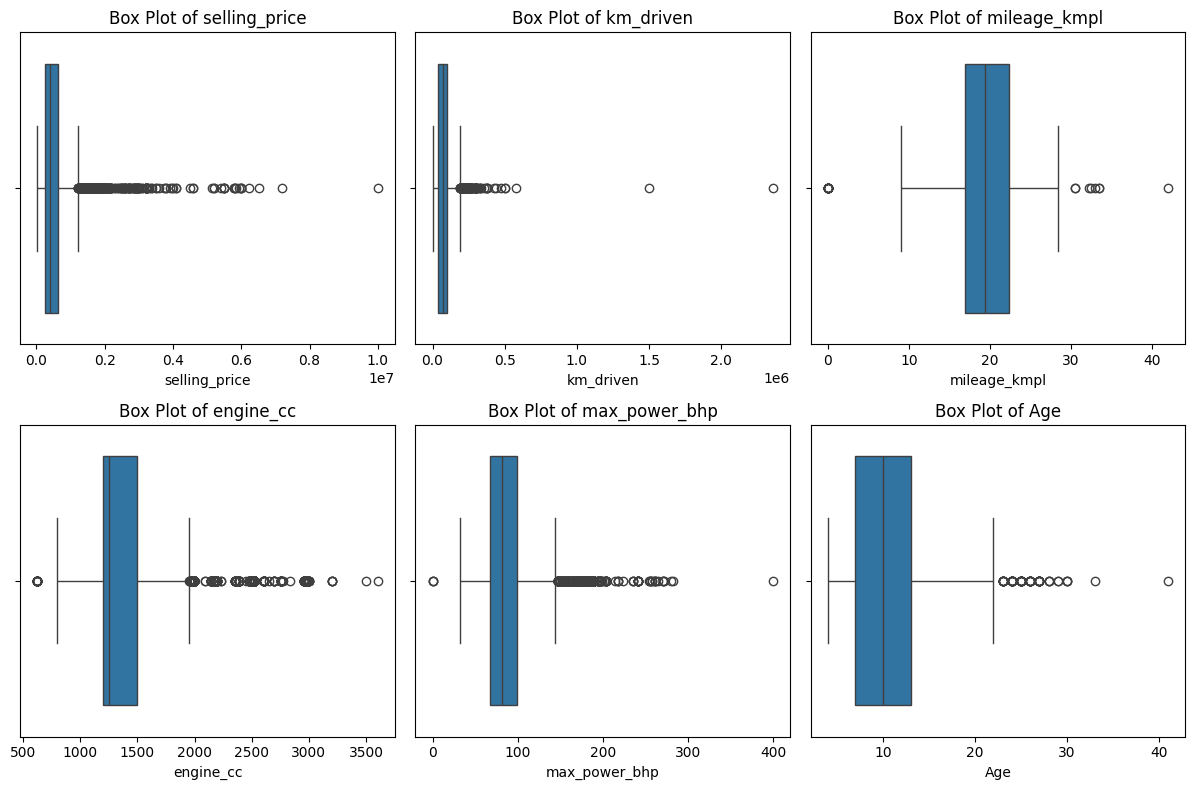

In [56]:
# Set the number of rows and columns for subplots
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
nrows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate required number of rows

# Set the figure size
plt.figure(figsize=(12, 4 * nrows))  # Adjust height based on the number of rows

# Create box plots for each numerical column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(nrows, 3, i + 1)  # Create a grid of subplots
    sns.boxplot(x=df[column])  # Box plot for the current column
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [57]:
import numpy as np
import pandas as pd



num_col = ['selling_price', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'seats']

for col in num_col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Calculate total number of data points
    total_points = df[col].shape[0]

    # Print the number and percentage of outliers
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")
    
    # Log Transformation for certain columns
    if col in ['selling_price', 'km_driven', 'engine_cc']:
        df[col] = np.log1p(df[col])

    # Handle Outliers:
    # For 'mileage_kmpl' column, replace outliers with the median value
    if col == 'mileage_kmpl':
        mileage_kmpl_median = df['mileage_kmpl'].median()
        df['mileage_kmpl'] = np.where(df['mileage_kmpl'] > upper_bound, mileage_kmpl_median, df['mileage_kmpl'])

    # For 'max_power_bhp', clip values above the 95th percentile
    elif col == 'max_power_bhp':
        max_power_bhp_95th = df['max_power_bhp'].quantile(0.95)
        df['max_power_bhp'] = df['max_power_bhp'].clip(upper=max_power_bhp_95th)

    # For 'seats', replace values above upper_bound with mode and remove rows exceeding the upper_bound
    elif col == 'seats':
        seats_mode = df['seats'].mode()[0]
        df['seats'] = np.where(df['seats'] > upper_bound, seats_mode, df['seats'])
        df = df[df['seats'] <= upper_bound]


print("\nData after Outlier Treatment:")
df.head()


Total Outliers in selling_price: 327 -- 4.75%
Total Outliers in km_driven: 166 -- 2.41%
Total Outliers in mileage_kmpl: 23 -- 0.33%
Total Outliers in engine_cc: 1200 -- 17.44%
Total Outliers in max_power_bhp: 374 -- 5.44%
Total Outliers in seats: 1660 -- 24.13%

Data after Outlier Treatment:


,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine_cc,max_power_bhp,seats,Model,Age
0,13.017005,11.887938,Diesel,Individual,Manual,23.40,7.130099,74.00,5,Maruti,10
1,12.821261,11.695255,Diesel,Individual,Manual,21.14,7.312553,103.52,5,Skoda,10
2,11.970357,11.849405,Petrol,Individual,Manual,17.70,7.311886,78.00,5,Honda,18
3,12.323860,11.751950,Diesel,Individual,Manual,23.00,7.242082,90.00,5,Hyundai,14
4,11.775297,11.695255,Petrol,Individual,Manual,16.10,7.169350,88.20,5,Maruti,17


***Feature Engineering***

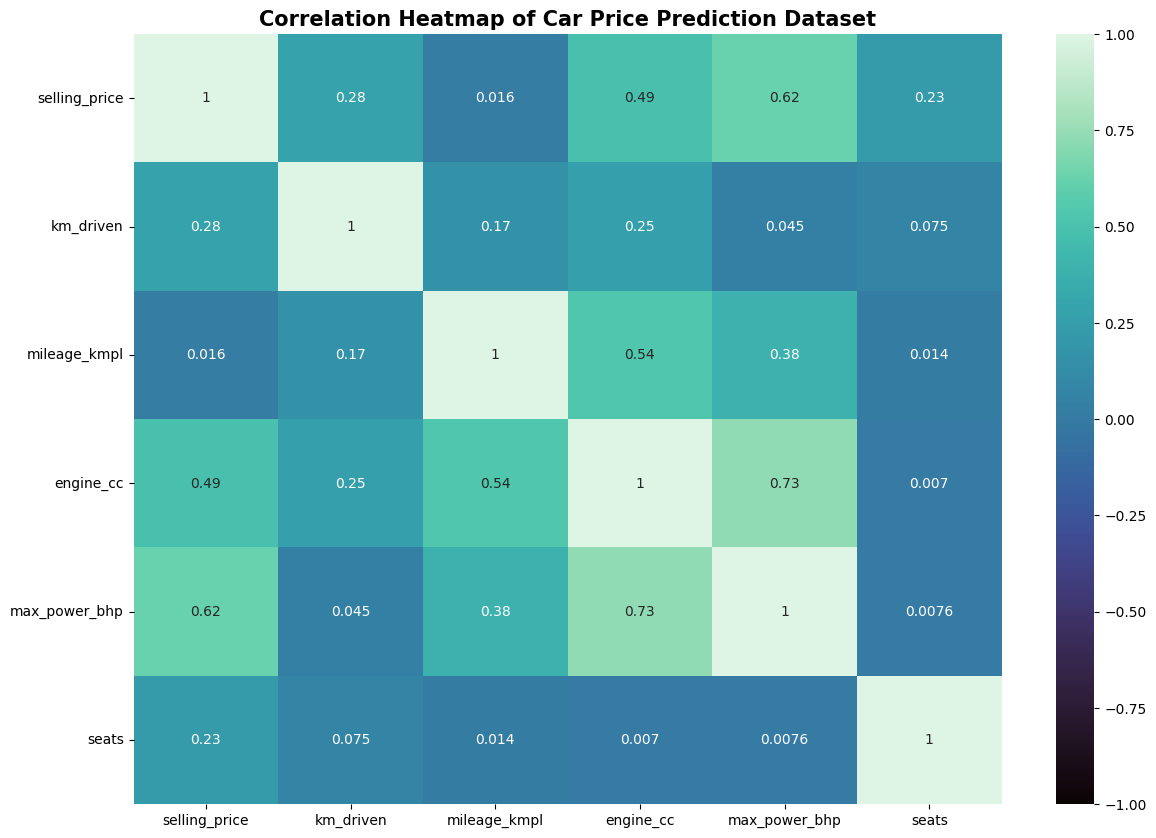

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


num_col = ['selling_price', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'seats']

# Select only the numerical columns from the DataFrame
df_num = df[num_col]

# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Plot the heatmap
plt.figure(figsize=(14,10))
plot = sns.heatmap(abs(corr_matrix), annot=True, cmap='mako', vmin=-1)

plt.title('Correlation Heatmap of Car Price Prediction Dataset', weight='bold', fontsize=15)

# Set the rotation and alignment of the x and y axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.show()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6879 non-null   float64
 1   km_driven      6879 non-null   float64
 2   fuel           6879 non-null   object 
 3   seller_type    6879 non-null   object 
 4   transmission   6879 non-null   object 
 5   mileage_kmpl   6879 non-null   float64
 6   engine_cc      6879 non-null   float64
 7   max_power_bhp  6879 non-null   float64
 8   seats          6879 non-null   int32  
 9   Model          6879 non-null   object 
 10  Age            6879 non-null   int64  
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 564.4+ KB


In [60]:
for i in df.columns:
  print(i , ':', df[i].nunique())

selling_price : 677
km_driven : 921
fuel : 4
seller_type : 3
transmission : 2
mileage_kmpl : 376
engine_cc : 122
max_power_bhp : 236
seats : 4
Model : 32
Age : 29


In [61]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)
df.head()

,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats,Model,Age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,13.017005,11.887938,23.40,7.130099,74.00,5,Maruti,10,True,False,False,True,False,True
1,12.821261,11.695255,21.14,7.312553,103.52,5,Skoda,10,True,False,False,True,False,True
2,11.970357,11.849405,17.70,7.311886,78.00,5,Honda,18,False,False,True,True,False,True
3,12.323860,11.751950,23.00,7.242082,90.00,5,Hyundai,14,True,False,False,True,False,True
4,11.775297,11.695255,16.10,7.169350,88.20,5,Maruti,17,False,False,True,True,False,True


***Scaling Features***

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_cols = ['selling_price', 'km_driven', 'engine_cc', 'max_power_bhp', 'mileage_kmpl', 'seats','Age']

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display scaled DataFrame
df.head()



,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats,Model,Age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.466171,0.800702,0.823944,0.395102,0.500677,1.0,Maruti,0.162162,True,False,False,True,False,True
1,0.432475,0.786921,0.744366,0.499223,0.700406,1.0,Skoda,0.162162,True,False,False,True,False,True
2,0.285998,0.797946,0.623239,0.498843,0.527740,1.0,Honda,0.378378,False,False,True,True,False,True
3,0.346851,0.790976,0.809859,0.459008,0.608931,1.0,Hyundai,0.270270,True,False,False,True,False,True
4,0.252420,0.786921,0.566901,0.417501,0.596752,1.0,Maruti,0.351351,False,False,True,True,False,True


***Modeling***

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score


In [64]:
X = df.drop(columns=['selling_price','Model'], axis=1)
y = df['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Linear Regression***

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error
rmse_lr = mse_lr ** 0.5  # Root Mean Squared Error
r2_lr = r2_score(y_test, y_pred_lr)  # R2 Score

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_lr:f}")
print(f"Mean Squared Error (MSE): {mse_lr:f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:f}")
print(f"R² Score: {r2_lr:f}")


Linear Regression Results:
Mean Absolute Error (MAE): 0.042099
Mean Squared Error (MSE): 0.003065
Root Mean Squared Error (RMSE): 0.055360
R² Score: 0.823362


***K-Nearest Neighbors (KNN) Regression***

In [ ]:
# Initialize and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Regression model
mae_knn = mean_absolute_error(y_test, y_pred_knn)  # Mean Absolute Error
mse_knn = mean_squared_error(y_test, y_pred_knn)  # Mean Squared Error
rmse_knn = mse_knn ** 0.5  # Root Mean Squared Error
r2_knn = r2_score(y_test, y_pred_knn)  # R² Score

print("\nKNN Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_knn:f}")
print(f"Mean Squared Error (MSE): {mse_knn:f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:f}")
print(f"R² Score: {r2_knn:f}")


KNN Regression Results:
Mean Absolute Error (MSE): 0.032725
Mean Squared Error (MSE): 0.002070
Root Mean Squared Error (RMSE): 0.045496
R² Score: 0.880700


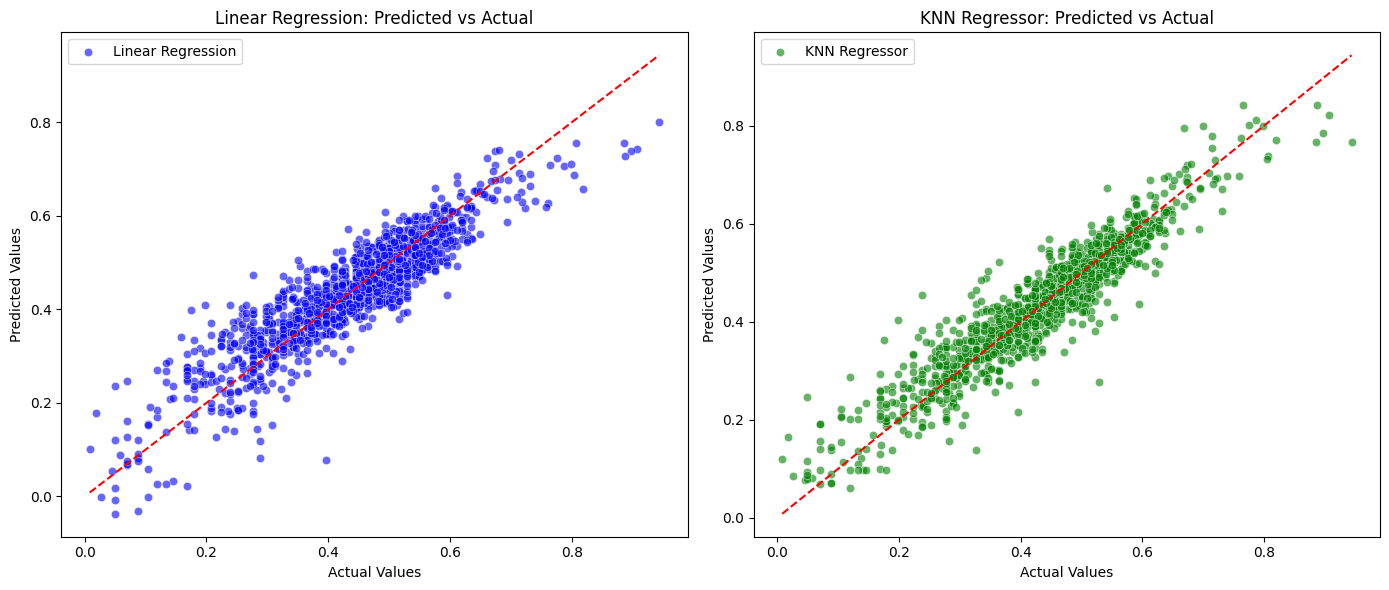

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_lr = y_test - y_pred_lr
residuals_knn = y_test - y_pred_knn

# Predicted vs. Actual Values
plt.figure(figsize=(14, 6))

# Linear Regression: Predicted vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# KNN: Predicted vs Actual
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_knn, color='green', alpha=0.6, label='KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('KNN Regressor: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()